In [1]:
library(ggplot2)
library(tidyverse)
library(hrbrthemes)
library(RColorBrewer)
library(plyr)
library(data.table)
library(reshape2)


── Attaching packages ───────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ──────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------

In [2]:
data <- read.table('merged_table_sumROIs.csv', sep=',', header=T)

In [3]:
dim(data)

[1] 275  19

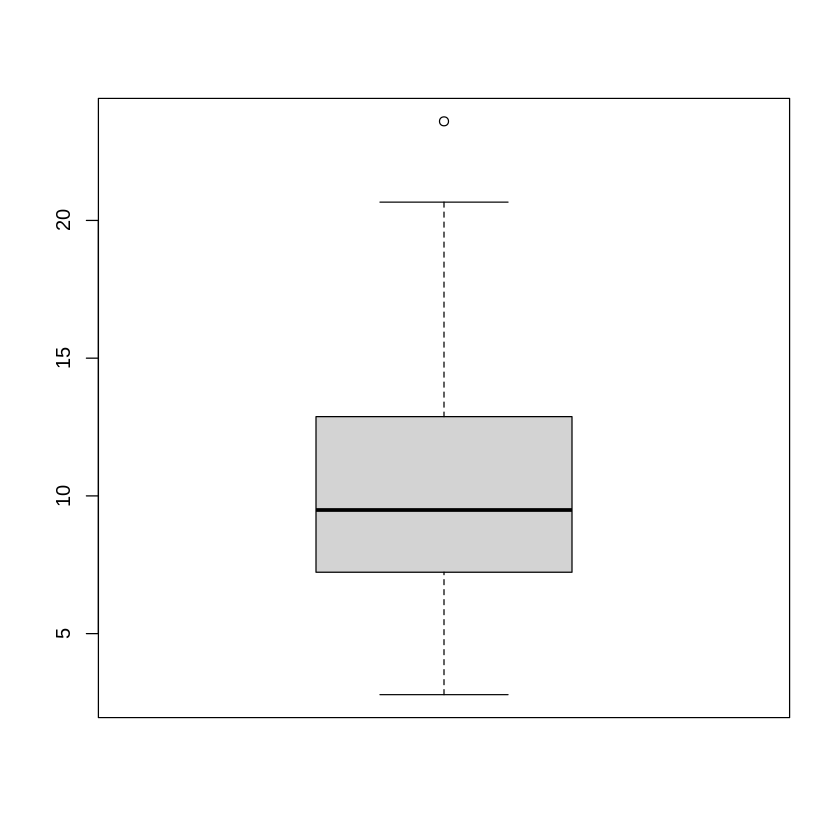

In [4]:
boxplot(data$age)

In [5]:
head(data)

,X,ids,age,Frontal,Temporal,Hippocampus,Frontal_Parietal,Parietal,Insula,Cingulate,Occipital,BasalGanglia,Thalamus,Cerebellum,CorpusCallosum,Ventricles,VentralDC,WM,Brainstem
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,sub-NDARAA075AMK,6.728040,196804.0,127336.0,6965.6,8467.1,139828.6,13521.0,26263.5,49594.7,25273.0,14760.8,132619.5,3660.4,11355.0,7407.0,398828.8,17516.4
2,2,sub-NDARAE012DGA,6.927903,205851.4,139139.9,7721.4,8531.5,140385.4,16442.3,29905.7,52391.1,21334.9,13871.4,126392.1,3997.3,17714.3,7116.3,405602.2,16766.1
3,3,sub-NDARAM277WZT,14.320670,172455.7,127434.1,8385.3,8291.0,115504.7,12422.1,24655.1,49853.9,20262.1,13612.4,135728.0,2885.8,11799.7,8553.3,381229.7,19896.9
4,4,sub-NDARAM675UR8,5.548482,162992.8,111344.9,7252.5,6149.2,98075.7,13848.0,22275.4,47493.0,24496.0,14663.9,134251.0,3639.9,10426.7,6895.5,392950.3,15642.4
5,5,sub-NDARAP522AFK,11.612822,181175.4,142062.4,9153.7,10356.4,140009.4,15285.0,26437.1,59864.8,26555.7,16355.8,154615.1,3181.1,17815.9,8710.6,474437.5,21201.0
6,6,sub-NDARAT100AEQ,16.489276,181977.4,121172.0,8020.6,8226.4,117791.4,13006.3,25400.4,54860.2,24759.0,16398.7,134892.6,3986.6,12899.4,9076.3,442616.4,20189.1


In [6]:
test_subs <- read.table('dyst_data_sumROIs.csv', sep=',', header=T)

In [7]:
test_subs

X,ids,age,Frontal,Temporal,Hippocampus,Frontal_Parietal,Parietal,Insula,Cingulate,Occipital,BasalGanglia,Thalamus,Cerebellum,CorpusCallosum,Ventricles,VentralDC,WM,Brainstem
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,001_20180626,13.898630,213132.1,156251.0,7342.9,8398.1,155219.5,16576.3,29341.0,54134.5,24950.4,13703.7,145854.0,3852.1,46523.3,8325.2,488040.9,18604.9
2,002_20180712,12.315068,190001.9,131534.8,4328.7,7843.6,127062.7,15219.2,26837.1,55118.2,17717.3,11829.9,128656.9,2821.8,27288.0,6982.5,428196.1,16856.4
3,003_20140912,5.350685,162503.8,108383.0,6545.4,8211.0,125377.9,11349.8,23355.3,60686.6,15308.3,12196.0,114930.8,2037.4,8552.6,5855.0,272812.8,13094.1
4,003_20151009,6.424658,163771.4,108856.8,6611.0,7794.3,126406.3,11591.3,24336.1,59623.8,14995.8,12451.4,116201.1,2168.6,8949.2,5855.9,278567.1,13532.2


In [8]:
test <- '001_20180626'

In [9]:
test <-  subset(test_subs, ids == test)
test

,X,ids,age,Frontal,Temporal,Hippocampus,Frontal_Parietal,Parietal,Insula,Cingulate,Occipital,BasalGanglia,Thalamus,Cerebellum,CorpusCallosum,Ventricles,VentralDC,WM,Brainstem
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,001_20180626,13.89863,213132.1,156251,7342.9,8398.1,155219.5,16576.3,29341,54134.5,24950.4,13703.7,145854,3852.1,46523.3,8325.2,488040.9,18604.9


In [10]:
all <- rbind.fill(data, test)
head(all)

,X,ids,age,Frontal,Temporal,Hippocampus,Frontal_Parietal,Parietal,Insula,Cingulate,Occipital,BasalGanglia,Thalamus,Cerebellum,CorpusCallosum,Ventricles,VentralDC,WM,Brainstem
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,sub-NDARAA075AMK,6.728040,196804.0,127336.0,6965.6,8467.1,139828.6,13521.0,26263.5,49594.7,25273.0,14760.8,132619.5,3660.4,11355.0,7407.0,398828.8,17516.4
2,2,sub-NDARAE012DGA,6.927903,205851.4,139139.9,7721.4,8531.5,140385.4,16442.3,29905.7,52391.1,21334.9,13871.4,126392.1,3997.3,17714.3,7116.3,405602.2,16766.1
3,3,sub-NDARAM277WZT,14.320670,172455.7,127434.1,8385.3,8291.0,115504.7,12422.1,24655.1,49853.9,20262.1,13612.4,135728.0,2885.8,11799.7,8553.3,381229.7,19896.9
4,4,sub-NDARAM675UR8,5.548482,162992.8,111344.9,7252.5,6149.2,98075.7,13848.0,22275.4,47493.0,24496.0,14663.9,134251.0,3639.9,10426.7,6895.5,392950.3,15642.4
5,5,sub-NDARAP522AFK,11.612822,181175.4,142062.4,9153.7,10356.4,140009.4,15285.0,26437.1,59864.8,26555.7,16355.8,154615.1,3181.1,17815.9,8710.6,474437.5,21201.0
6,6,sub-NDARAT100AEQ,16.489276,181977.4,121172.0,8020.6,8226.4,117791.4,13006.3,25400.4,54860.2,24759.0,16398.7,134892.6,3986.6,12899.4,9076.3,442616.4,20189.1


In [11]:
dim(all)

[1] 276  19

In [12]:
all <- all %>% 
    mutate(age_fct = factor(as.integer(age))) %>%
    mutate(age_int = as.integer(age))

In [13]:
zscore <- function(x, na.rm = FALSE) (x - mean(x, na.rm = na.rm)) / sd(x, na.rm)

In [14]:
z <- all %>% 
    select(-c('X')) %>% 
    mutate_if(is.numeric, zscore, na.rm=T)

In [15]:
z['age'] <- all['age']
z <- z %>% mutate(age_int=as.integer(age))

In [16]:
head(z)

,ids,age,Frontal,Temporal,Hippocampus,Frontal_Parietal,Parietal,Insula,Cingulate,Occipital,BasalGanglia,Thalamus,Cerebellum,CorpusCallosum,Ventricles,VentralDC,WM,Brainstem,age_fct,age_int
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>
1,sub-NDARAA075AMK,6.728040,0.5213496,-0.3454908,-1.3480641,0.13363601,0.8485984,-0.4593987,-0.11672884,-0.8671227,0.38827476,0.12444335,-0.8756327,0.1429097,-0.5479698,-0.5233271,-0.3173293,-0.5699423,6,6
2,sub-NDARAE012DGA,6.927903,0.9556744,0.4689812,-0.4578635,0.17228800,0.8809462,1.1778775,0.83954686,-0.4637403,-1.27338840,-0.46479859,-1.2588547,0.7718050,0.6263118,-0.8225415,-0.1922031,-0.8724542,6,6
3,sub-NDARAM277WZT,14.320670,-0.6475023,-0.3387219,0.3240949,0.02794323,-0.5645197,-1.0752899,-0.53902137,-0.8297329,-1.72605142,-0.63639029,-0.6843417,-1.3030456,-0.4658534,0.6565470,-0.6424404,0.3898465,14,14
4,sub-NDARAM675UR8,5.548482,-1.1017734,-1.4488808,-1.0101459,-1.25753546,-1.5770726,-0.2761278,-1.16382212,-1.1702942,0.06042319,0.06024553,-0.7752334,0.1046421,-0.7193858,-1.0498085,-0.4259238,-1.3255164,5,5
5,sub-NDARAP522AFK,11.612822,-0.2289089,0.6706345,1.2291362,1.26756770,0.8591022,0.5292554,-0.07114939,0.6143455,0.92950412,1.18115675,0.4779335,-0.7518055,0.6450728,0.8184542,1.0794029,0.9156438,11,11
6,sub-NDARAT100AEQ,16.489276,-0.1904085,-0.7708084,-0.1054581,-0.01082879,-0.4316719,-0.7478683,-0.34333956,-0.1075711,0.17139483,1.20957869,-0.7357506,0.7518312,-0.2627874,1.1948652,0.4915664,0.5076580,16,16


In [17]:
#write.csv(data_z, 'zscores_merged_table.csv')

In [18]:
sum(is.na(z['age']))

[1] 0

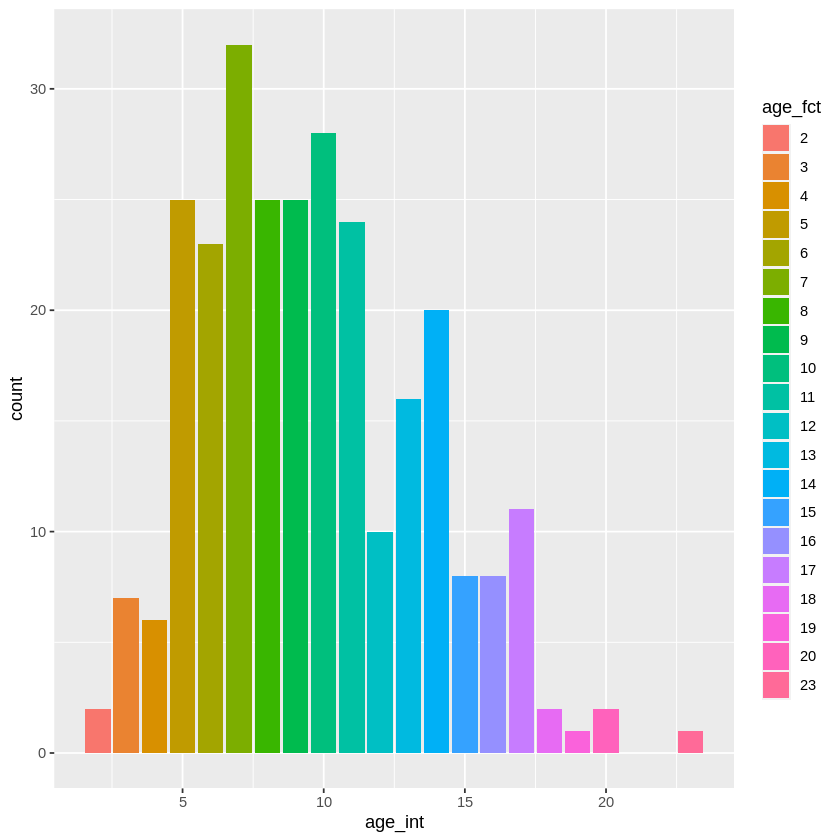

In [19]:
ggplot(all, aes(x=age_int, fill=age_fct)) +
    geom_bar()

In [20]:
dim(all)

[1] 276  21

In [21]:
all[276,]

,X,ids,age,Frontal,Temporal,Hippocampus,Frontal_Parietal,Parietal,Insula,Cingulate,⋯,BasalGanglia,Thalamus,Cerebellum,CorpusCallosum,Ventricles,VentralDC,WM,Brainstem,age_fct,age_int
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>
276,1,001_20180626,13.89863,213132.1,156251,7342.9,8398.1,155219.5,16576.3,29341,⋯,24950.4,13703.7,145854,3852.1,46523.3,8325.2,488040.9,18604.9,13,13


In [22]:
library(dplyr)


In [23]:
roi_age <- all %>%select(-c(X,age, age_fct)) %>% 
    gather(key='ROI',value='Volume', 'Frontal':'Brainstem') %>%
    dplyr::group_by(age_int,ROI) %>% 
    dplyr::summarise(mean=mean(Volume, na.rm=T),
                    p1sd=mean(Volume, na.rm=T)+sd(Volume, na.rm=T),
                    m1sd=mean(Volume, na.rm=T)-sd(Volume, na.rm=T),
                    m2sd=mean(Volume, na.rm=T)-2*sd(Volume, na.rm=T))

`summarise()` has grouped output by 'age_int'. You can override using the `.groups` argument.



In [24]:
head(roi_age)

age_int,ROI,mean,p1sd,m1sd,m2sd
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2,BasalGanglia,22541.95,23404.974,21678.926,20815.902
2,Brainstem,15686.60,17489.581,13883.619,12080.638
2,Cerebellum,136765.10,149561.470,123968.730,111172.360
2,Cingulate,26867.55,29144.222,24590.878,22314.207
2,CorpusCallosum,2869.45,3484.562,2254.338,1639.226
2,Frontal,166038.20,174947.321,157129.079,148219.958


In [25]:
dim(all)

[1] 276  21

In [26]:
test_sub <- all[276,]
test_sub <- test_sub %>%  gather(key='ROI',value='Volume', 'Frontal':'Brainstem') %>% select(-c(X,ids))

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


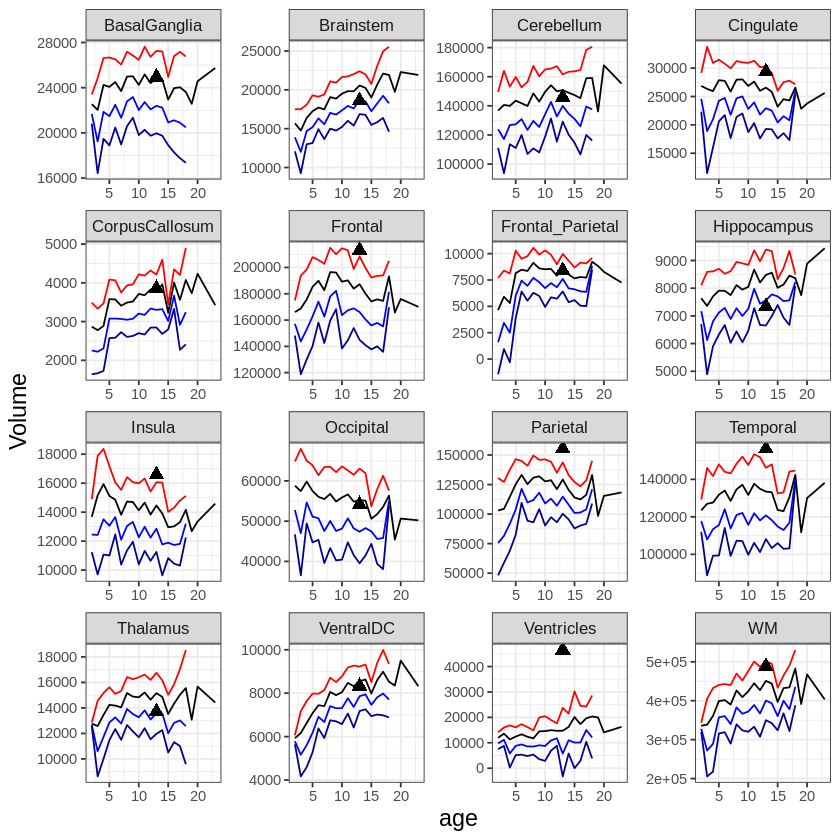

In [27]:
ggplot(roi_age, aes(x=age_int)) +
    geom_line(aes(x=age_int,y=mean)) +
    geom_line(aes(x=age_int,y=p1sd), color='red') +
    geom_line(aes(x=age_int,y=m1sd), color='blue') +
    geom_line(aes(x=age_int,y=m2sd), color='darkblue') +
    geom_point(data=test_sub, aes(x=age_int,y=Volume), shape=17, size=3, color='black') +
    facet_wrap(vars(ROI), scales = "free") +
    labs(x='age', y='Volume') +
    theme_bw() +
    theme(strip.text.x = element_text(size = 10),
         axis.title.x = element_text(size=14),
         axis.title.y = element_text(size=14))

In [28]:
ggsave('./roi_vol_grid.png', plot=last_plot(), width=600, height=300, units='mm')

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


In [64]:
str(roi_age2)

grouped_df [304 × 6] (S3: grouped_df/tbl_df/tbl/data.frame)
 $ age_int: int [1:304] 2 2 2 2 2 2 2 2 2 2 ...
 $ ROI    : chr [1:304] "BasalGanglia" "Brainstem" "Cerebellum" "Cingulate" ...
 $ mean   : num [1:304] 22542 15687 136765 26868 2869 ...
 $ p1sd   : num [1:304] 23405 17490 149561 29144 3485 ...
 $ m1sd   : num [1:304] 21679 13884 123969 24591 2254 ...
 $ m2sd   : num [1:304] 20816 12081 111172 22314 1639 ...
 - attr(*, "groups")= tibble [19 × 2] (S3: tbl_df/tbl/data.frame)
  ..$ age_int: int [1:19] 2 3 4 5 6 7 8 9 10 11 ...
  ..$ .rows  : list<int> [1:19] 
  .. ..$ : int [1:16] 1 2 3 4 5 6 7 8 9 10 ...
  .. ..$ : int [1:16] 17 18 19 20 21 22 23 24 25 26 ...
  .. ..$ : int [1:16] 33 34 35 36 37 38 39 40 41 42 ...
  .. ..$ : int [1:16] 49 50 51 52 53 54 55 56 57 58 ...
  .. ..$ : int [1:16] 65 66 67 68 69 70 71 72 73 74 ...
  .. ..$ : int [1:16] 81 82 83 84 85 86 87 88 89 90 ...
  .. ..$ : int [1:16] 97 98 99 100 101 102 103 104 105 106 ...
  .. ..$ : int [1:16] 113 114 115 116 1

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'age_int' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(

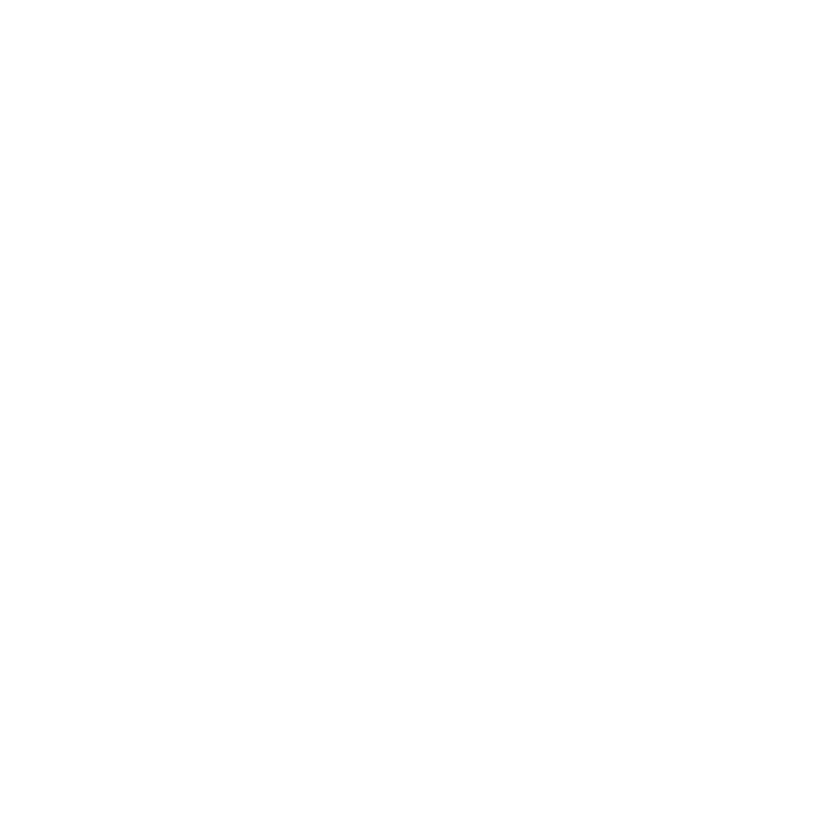

In [62]:
roi_age2 <- roi_age %>% filter(age_int <=20)
ggplot(roi_age2, aes(x=age_int)) +
    geom_area(aes(x=age_int,y=mean)) +
    geom_area(aes(x=age_int,y=p1sd)) +
    geom_area(aes(x=age_int,y=m1sd)) +
    geom_area(aes(x=age_int,y=m2sd)) +
    geom_point(data=test_sub, aes(x=age_int,y=Volume), shape=17, size=3, color='black') +
    facet_wrap(vars(ROI), scales = "free") +
    labs(x='age', y='Volume') +
    theme_bw() +
    theme(strip.text.x = element_text(size = 10),
         axis.title.x = element_text(size=14),
         axis.title.y = element_text(size=14))

In [31]:
# Plot2

In [32]:
roi_agedbl <- all %>%select(-c(X,ids, age_int, age_fct)) %>% 
    gather(key='ROI',value='Volume', 'Frontal':'Brainstem') 
head(roi_agedbl)

,age,ROI,Volume
,<dbl>,<chr>,<dbl>
1,6.728040,Frontal,196804.0
2,6.927903,Frontal,205851.4
3,14.320670,Frontal,172455.7
4,5.548482,Frontal,162992.8
5,11.612822,Frontal,181175.4
6,16.489276,Frontal,181977.4


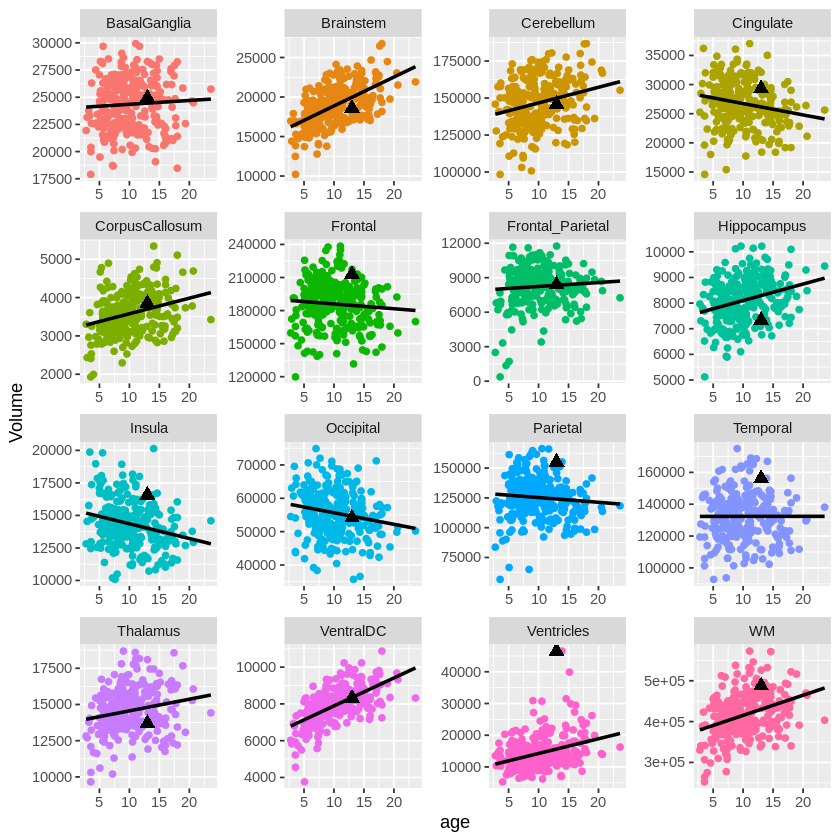

In [33]:
ggplot(roi_agedbl, aes(x=age, y=Volume, color=ROI)) +
    geom_point() +
    geom_smooth(method='lm', se=F, formula='y~x', color='black') +
    geom_point(data=test_sub, aes(x=age_int,y=Volume), shape=17, size=3, color='black') +
    facet_wrap(vars(ROI), scales = "free") +
    labs(x='age', y='Volume') +
    theme(legend.position = 'none')

In [34]:
ggsave('./roi_vol2_grid.png', plot=last_plot(), width=600, height=300, units='mm')

In [35]:
# Spider Plot

In [36]:
library(fmsb)


In [37]:
#all

In [38]:
zscore <- function(x, na.rm = FALSE) (x - mean(x, na.rm = na.rm)) / sd(x, na.rm)

In [39]:
z_age <- all %>% filter(age > test_sub['age'][1,]-1 & age <= test_sub['age'][1,]+1) %>%
dplyr::mutate(across(Frontal:Brainstem, zscore))

In [40]:
z_age[34,]

,X,ids,age,Frontal,Temporal,Hippocampus,Frontal_Parietal,Parietal,Insula,Cingulate,⋯,BasalGanglia,Thalamus,Cerebellum,CorpusCallosum,Ventricles,VentralDC,WM,Brainstem,age_fct,age_int
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>
34,1,001_20180626,13.89863,1.466374,1.635412,-1.372965,0.07816427,2.174769,1.237737,0.9067377,⋯,0.1264056,-0.8866423,-0.3438432,-0.01150195,4.260117,-0.3793326,0.8199879,-0.9980696,13,13


In [41]:
spiderplot_data <- z_age[34,] %>% select(-c(X,ids,age, age_int, age_fct))
spiderplot_data <- rbind(rep(2,16) , rep(-2,16) , spiderplot_data)

In [42]:
spiderplot_data

,Frontal,Temporal,Hippocampus,Frontal_Parietal,Parietal,Insula,Cingulate,Occipital,BasalGanglia,Thalamus,Cerebellum,CorpusCallosum,Ventricles,VentralDC,WM,Brainstem
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.000000,2.000000,2.000000,2.00000000,2.000000,2.000000,2.0000000,2.0000000,2.0000000,2.0000000,2.0000000,2.00000000,2.000000,2.0000000,2.0000000,2.0000000
2,-2.000000,-2.000000,-2.000000,-2.00000000,-2.000000,-2.000000,-2.0000000,-2.0000000,-2.0000000,-2.0000000,-2.0000000,-2.00000000,-2.000000,-2.0000000,-2.0000000,-2.0000000
34,1.466374,1.635412,-1.372965,0.07816427,2.174769,1.237737,0.9067377,-0.1519917,0.1264056,-0.8866423,-0.3438432,-0.01150195,4.260117,-0.3793326,0.8199879,-0.9980696


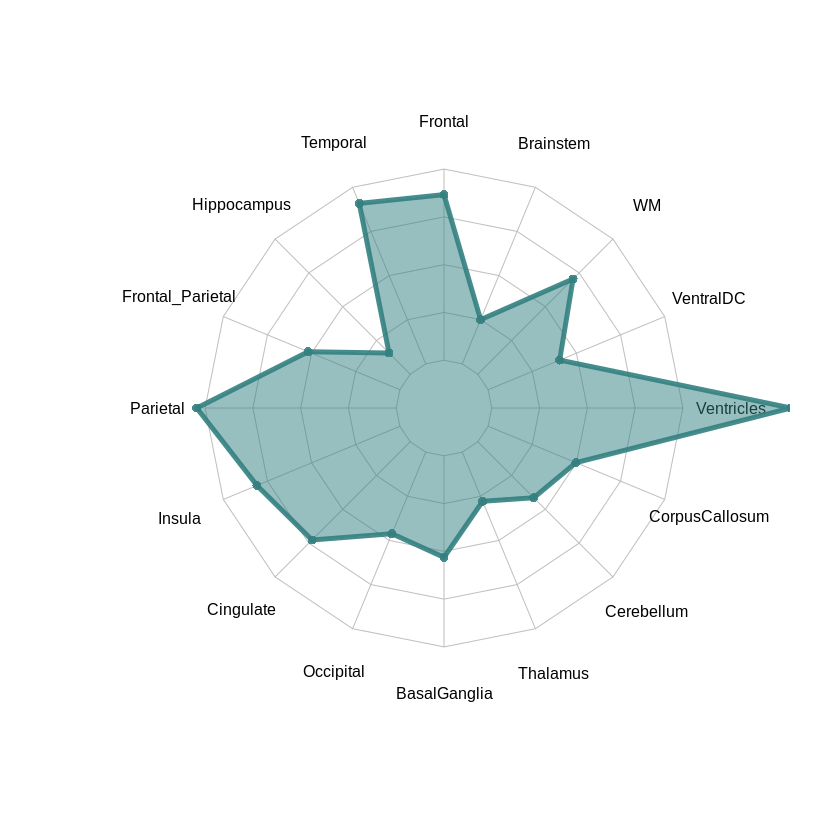

In [43]:
radarchart(spiderplot_data,
          pcol=rgb(0.2,0.5,0.5,0.9), pfcol=rgb(0.2,0.5,0.5,0.5), plwd=4,
          cglcol="grey", cglty=1, axislabcol="grey",
           cglwd=0.8,
          vlcex=0.8 )

In [44]:
## ggradar

In [45]:
## Plot 3

In [46]:
z_age <- all %>% filter(age > test_sub['age'][1,]-1 & age <= test_sub['age'][1,]+1) %>%
dplyr::mutate(across(Frontal:Brainstem, zscore))

In [47]:
dim(z)

[1] 276  20

In [48]:
test_sub <- z_age[34,] %>%select(-c(ids, age_int, age_fct)) %>% 
    gather(key='rois',value='z_score', 'Frontal':'Brainstem')
test_sub

X,age,rois,z_score
<int>,<dbl>,<chr>,<dbl>
1,13.89863,Frontal,1.46637398
1,13.89863,Temporal,1.63541206
1,13.89863,Hippocampus,-1.37296521
1,13.89863,Frontal_Parietal,0.07816427
1,13.89863,Parietal,2.17476870
1,13.89863,Insula,1.23773711
1,13.89863,Cingulate,0.90673769
1,13.89863,Occipital,-0.15199170
1,13.89863,BasalGanglia,0.12640559


In [49]:
test_sub['age'][1,]

[1] 13.89863

In [50]:
library(ggforce)

In [70]:
str(z_age)

'data.frame':	34 obs. of  21 variables:
 $ X               : int  3 21 28 33 46 52 88 93 95 97 ...
 $ ids             : chr  "sub-NDARAM277WZT" "sub-NDARCW963FP9" "sub-NDARDN489EXJ" "sub-NDAREG013BLG" ...
 $ age             : num  14.3 13.7 13.9 13.7 14.6 ...
 $ Frontal         : num  -0.5274 -0.1881 -0.0236 0.0557 1.3231 ...
 $ Temporal        : num  -0.466 -0.44 -0.67 -0.485 1.037 ...
 $ Hippocampus     : num  -0.155 -0.882 0.315 1.479 0.421 ...
 $ Frontal_Parietal: num  -0.00448 0.61927 0.28968 -0.04353 -0.37558 ...
 $ Parietal        : num  -0.6638 -0.4478 -0.3071 0.0761 1.0375 ...
 $ Insula          : num  -0.8971 -0.5376 -0.2343 -0.3479 -0.0298 ...
 $ Cingulate       : num  -0.441 -0.125 -0.771 -0.788 0.312 ...
 $ Occipital       : num  -0.73214 0.03294 -0.35764 0.09125 0.00147 ...
 $ BasalGanglia    : num  -1.818 -0.248 -0.311 0.59 0.892 ...
 $ Thalamus        : num  -0.9513 0.7194 0.0353 0.6166 0.529 ...
 $ Cerebellum      : num  -1.127 0.178 0.114 0.134 2.115 ...
 $ CorpusCall

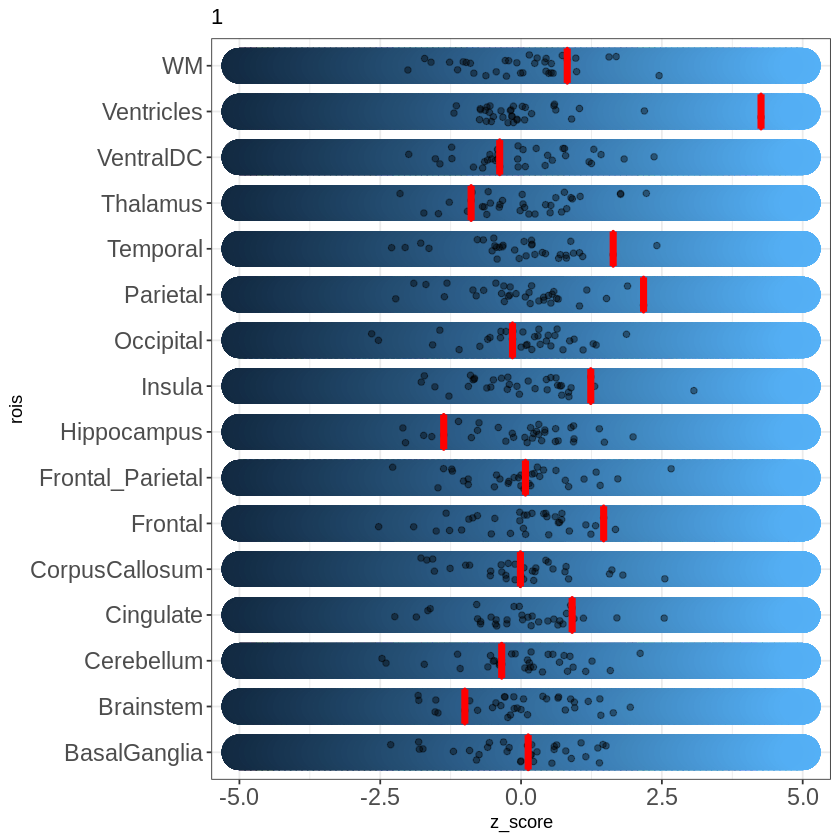

In [73]:
df_tile <- data.frame(rois=test_sub['rois'], scale=seq(0:length(test_sub['rois'])))
z_age %>%select(-c(ids, age_int, age_fct)) %>% 
gather(key='rois',value='z_score', 'Frontal':'Brainstem') %>%

ggplot(aes(x=rois, y=z_score)) +
    #geom_rect(aes(ymin=-1, ymax=+1, xmin=-Inf, xmax=Inf))+
#geom_rect(aes(ymin=-2.5, ymax=+-1, xmin=-Inf, xmax=Inf))+
#geom_rect(aes(ymin=1, ymax=2.5, xmin=-Inf, xmax=Inf))+
    #geom_tile(data=df_tile, aes(x = factor(rois), y = 1, height = Inf, width = 0.8), alpha = 0.3) +
    geom_link(aes(x = rois, xend=rois, y = -5, yend=+5, colour = stat(index)), lineend = "round", size = 10, alpha = 0.5)+
    geom_jitter(alpha=0.4, width = 0.25) +
    geom_boxplot(data=test_sub, aes(x=rois, y=z_score), color='red', size=1)+
    coord_flip() +
    theme_bw() +
    labs(title=test) + 
    theme(legend.position="none",
         axis.text.x = element_text(size=14),
         axis.text.y = element_text(size=14))

In [52]:
stat(index)

ERROR: Error in stat(index): object 'index' not found
